In [1]:
from numpy import *

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(m, b, data):
    totalError = 0.0
    numInstances = data.shape[0]
    for i in range(numInstances):
        adr = data[i, 0]  # Row 'i' column 'ADR'
        rating = data[i, 1]  # Row 'i' column 'Rating'

        # The real rating
        currentTarget = rating

        # Predicted rating with our current fitting line
        # y = mx + b
        currentOutput = m * adr + b

        # Compute squared error
        currentSquaredError = (currentTarget - currentOutput) ** 2

        # Add it to the total error
        totalError += currentSquaredError

    sse = totalError / numInstances

    return sse

In [3]:
def gradient_descent_step(m, b, data, learningRate):
    N = data.shape[0]
    m_grad = 0
    b_grad = 0

    for i in range(N):
        # Get current pair (x,y)
        x = data[i, 0]
        y = data[i, 1]

        # Partial derivative respect 'm'
        dm = -((2 / N) * x * (y - (m * x + b)))

        # Partial derivative respect 'b'
        db = - ((2 / N) * (y - (m * x + b)))

        # Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db

    # Set the new 'better' updated 'm' and 'b'
    m_updated = m - learningRate * m_grad
    b_updated = b - learningRate * b_grad

    return m_updated, b_updated

In [4]:
def predict(inter, slope):
    freedom = int(input("Enter % Of Freedom(0-100): "))
    if (100 > freedom < 0):
        print("Invalid Input")
    else:
        happiness = (slope * (freedom / 100) + inter) * 1000
        print("The predicted happiness is: {0}".format(happiness))
        predict(inter, slope)

In [5]:
def run():
    csv_data = pd.read_csv("2017.csv")
    csv_data.head()

    data = csv_data.as_matrix()

    m = 0
    b = 0
    learningRate = 0.0001
    error = compute_error_for_line_given_points(m, b, data)

    print('For the fitting line: y = %sx + %s\nSSE: %.2f' % (m, b, error))

    for i in range(1000):
        m, b = gradient_descent_step(m, b, data, learningRate)
        error = compute_error_for_line_given_points(m, b, data)
        print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' % (i + 1, m, b, error))

    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' % (m, b, error))

    plt.scatter(x=data[:, 0], y=data[:, 1])
    plt.xlabel("Freedom")
    plt.ylabel("Happiness Score")
    # plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Freedom vs Happiness Score')
    ax.scatter(x=data[:, 0], y=data[:, 1], label='Data')
    plt.plot(data[:, 0], m * data[:, 0] + b, color='red', label='Our Fitting Line')
    ax.set_xlabel('Freedom')
    ax.set_ylabel('Happiness Score')
    ax.legend(loc='best')

    plt.show()

    predict(b, m)

For the fitting line: y = 0x + 0
SSE: 0.18
At step 1 - Line: y = 0.000452x + 0.000081 - Error: 0.182729
At step 2 - Line: y = 0.000901x + 0.000161 - Error: 0.180656
At step 3 - Line: y = 0.001347x + 0.000240 - Error: 0.178608
At step 4 - Line: y = 0.001790x + 0.000319 - Error: 0.176585
At step 5 - Line: y = 0.002231x + 0.000398 - Error: 0.174587
At step 6 - Line: y = 0.002669x + 0.000476 - Error: 0.172615
At step 7 - Line: y = 0.003104x + 0.000554 - Error: 0.170666
At step 8 - Line: y = 0.003537x + 0.000631 - Error: 0.168742
At step 9 - Line: y = 0.003967x + 0.000707 - Error: 0.166842
At step 10 - Line: y = 0.004394x + 0.000783 - Error: 0.164965
At step 11 - Line: y = 0.004818x + 0.000859 - Error: 0.163112
At step 12 - Line: y = 0.005240x + 0.000934 - Error: 0.161281
At step 13 - Line: y = 0.005659x + 0.001009 - Error: 0.159474
At step 14 - Line: y = 0.006076x + 0.001083 - Error: 0.157688
At step 15 - Line: y = 0.006490x + 0.001157 - Error: 0.155925
At step 16 - Line: y = 0.006901x + 0

At step 479 - Line: y = 0.068998x + 0.012281 - Error: 0.015908
At step 480 - Line: y = 0.069021x + 0.012285 - Error: 0.015903
At step 481 - Line: y = 0.069043x + 0.012289 - Error: 0.015898
At step 482 - Line: y = 0.069066x + 0.012293 - Error: 0.015892
At step 483 - Line: y = 0.069088x + 0.012297 - Error: 0.015887
At step 484 - Line: y = 0.069110x + 0.012301 - Error: 0.015882
At step 485 - Line: y = 0.069132x + 0.012304 - Error: 0.015877
At step 486 - Line: y = 0.069154x + 0.012308 - Error: 0.015872
At step 487 - Line: y = 0.069176x + 0.012312 - Error: 0.015867
At step 488 - Line: y = 0.069198x + 0.012316 - Error: 0.015862
At step 489 - Line: y = 0.069219x + 0.012320 - Error: 0.015858
At step 490 - Line: y = 0.069241x + 0.012323 - Error: 0.015853
At step 491 - Line: y = 0.069262x + 0.012327 - Error: 0.015848
At step 492 - Line: y = 0.069283x + 0.012331 - Error: 0.015844
At step 493 - Line: y = 0.069304x + 0.012334 - Error: 0.015839
At step 494 - Line: y = 0.069325x + 0.012338 - Error: 0

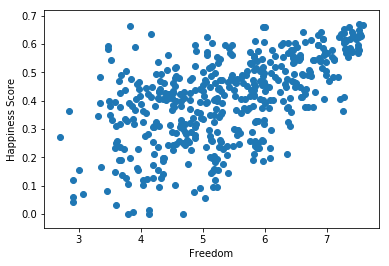

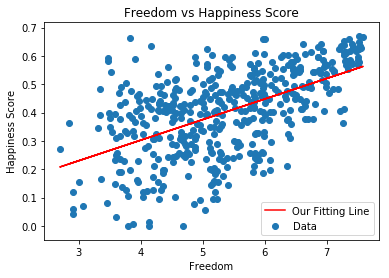

Enter % Of Freedom(0-100): 75
The predicted happiness is: 67.26599431172559


In [ ]:
run()